# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from stock_prices_predictions.get_data import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import mean_absolute_percentage_error

# Fetch data

define company:

In [2]:
company = "T"
days_ahead = 1

In [3]:
X_train, X_test = get_lstm_data(company)

In [4]:
X_train.shape

(3773, 1)

In [5]:
X_test.shape

(919, 1)

# Scale data

In [6]:
#try differente scalers
scaler = RobustScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [7]:
X_train_sc.shape

(3773, 1)

In [8]:
X_test_sc.shape

(919, 1)

# Create Sequences

In [9]:
#X_train, y_train = create_sequences(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
#X_test, y_test = create_sequences(pd.DataFrame(X_test_sc),pd.DataFrame(X_test), days_ahead)

In [10]:
#X_train, y_train = create_sequences_scaled(pd.DataFrame(X_train_sc), days_ahead)
#X_test, y_test = create_sequences_scaled(pd.DataFrame(X_test_sc), days_ahead)

In [11]:
X_train, y_train, y_train_simple = create_sequences_scaled_plus(pd.DataFrame(X_train_sc),pd.DataFrame(X_train), days_ahead)
X_test, y_test, y_test_simple = create_sequences_scaled_plus(pd.DataFrame(X_test_sc), pd.DataFrame(X_test), days_ahead)

In [12]:
X_train.shape

(919, 19, 1)

In [13]:
X_test.shape

(205, 19, 1)

In [14]:
y_train.shape

(919,)

In [15]:
y_test.shape

(205,)

In [16]:
y_test_simple

array([27.45345116, 28.66120338, 29.02769089, 28.91108131, 28.19476128,
       28.78614044, 28.31970024, 27.17025375, 27.40347862, 27.71998596,
       27.27853203, 27.59505463, 27.62003708, 27.78901291, 27.59469223,
       28.80290985, 29.08172798, 28.19457436, 28.64237785, 29.03948402,
       29.29294968, 29.02258492, 29.20845795, 29.47039032, 29.40279388,
       30.34063911, 30.2223568 , 30.08716583, 29.66584969, 30.10249329,
       29.34051132, 29.39188194, 29.67440987, 29.2891407 , 28.94667816,
       29.4175663 , 27.22580147, 28.42442513, 27.87648201, 28.01346779,
       28.06483841, 27.56826591, 27.45696449, 28.62133789, 28.77911949,
       29.08307076, 29.17858887, 28.83991051, 29.18727684, 28.79649162,
       28.38834   , 29.12648582, 28.99622154, 29.32622528, 29.76042938,
       28.80516815, 29.55200768, 30.20331383, 30.16857529, 29.99428558,
       29.85338593, 30.39057159, 30.82208061, 31.75555038, 32.16944122,
       32.08138275, 32.26631165, 32.35437775, 32.53931427, 33.40

In [17]:
len(y_test_simple)

205

In [18]:
X_train

array([[[ 0.18429837],
        [ 0.04557935],
        [ 0.08025981],
        ...,
        [-0.15779842],
        [-0.20851626],
        [-0.19583562]],

       [[ 0.05141525],
        [ 0.08311602],
        [ 0.05141525],
        ...,
        [-0.03734097],
        [-0.03100124],
        [-0.05636086]],

       [[-0.11658912],
        [-0.05636086],
        [-0.10073944],
        ...,
        [-0.06270036],
        [-0.05318994],
        [-0.02466104]],

       ...,

       [[ 1.4710648 ],
        [ 1.448074  ],
        [ 1.3711039 ],
        ...,
        [ 1.2651446 ],
        [ 1.2761401 ],
        [ 1.2621454 ]],

       [[ 1.3581083 ],
        [ 1.3231218 ],
        [ 1.2741408 ],
        ...,
        [ 1.2621454 ],
        [ 1.287136  ],
        [ 1.2861365 ]],

       [[ 1.2591468 ],
        [ 1.2591468 ],
        [ 1.2761401 ],
        ...,
        [ 1.2961333 ],
        [ 1.3091276 ],
        [ 1.306128  ]]], dtype=float32)

# Create model

In [19]:
model = Sequential()
#model.add(LSTM(units=72, activation='relu', input_shape= (36, 4), return_sequences=True))
model.add(LSTM(units=72, activation='tanh', input_shape= (19, 1)))
model.add(Dense(units=36, activation="tanh"))
model.add(Dense(units=10, activation="tanh"))
model.add(Dense(units=1, activation="linear"))

# Fit model


In [20]:
es = EarlyStopping(patience=20, restore_best_weights=True)

#try different losses: mae, mape, mse

#rmsprop optimizer
model.compile(optimizer="adam", loss="mse", metrics=["mae", "mape"])
#validation_split=0.2,
history_LSTM = model.fit(X_train, y_train, epochs=200, batch_size=16, workers=-1, validation_split=0.2, callbacks=[es])

Epoch 1/200
46/46 [==============================] - 5s 48ms/step - loss: 0.0074 - mae: 0.0608 - mape: 34917.8750 - val_loss: 0.0106 - val_mae: 0.0836 - val_mape: 7.9276
Epoch 2/200
46/46 [==============================] - 1s 31ms/step - loss: 0.0028 - mae: 0.0392 - mape: 14276.5732 - val_loss: 0.0252 - val_mae: 0.1391 - val_mape: 12.9035
Epoch 3/200
46/46 [==============================] - 2s 37ms/step - loss: 0.0025 - mae: 0.0367 - mape: 3063.2715 - val_loss: 0.0104 - val_mae: 0.0848 - val_mape: 7.9774
Epoch 4/200
46/46 [==============================] - 2s 34ms/step - loss: 0.0024 - mae: 0.0371 - mape: 18217.8398 - val_loss: 0.0137 - val_mae: 0.0996 - val_mape: 9.2373
Epoch 5/200
46/46 [==============================] - 2s 33ms/step - loss: 0.0021 - mae: 0.0337 - mape: 34610.2695 - val_loss: 0.0169 - val_mae: 0.1141 - val_mape: 10.7201
Epoch 6/200
46/46 [==============================] - 1s 30ms/step - loss: 0.0020 - mae: 0.0333 - mape: 7798.2910 - val_loss: 0.0168 - val_mae: 0.1152

In [21]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 11ms/step - loss: 0.1336 - mae: 0.3184 - mape: 14.7990


[0.13361218571662903, 0.3184428811073303, 14.798989295959473]

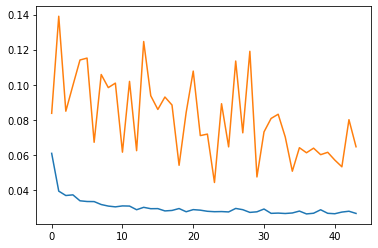

In [22]:
plt.plot(history_LSTM.history["mae"])
plt.plot(history_LSTM.history["val_mae"])

# Test Model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 72)                21312     
_________________________________________________________________
dense (Dense)                (None, 36)                2628      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                370       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 24,321
Trainable params: 24,321
Non-trainable params: 0
_________________________________________________________________


In [24]:
prediction = model.predict(X_test)

In [25]:
prediction

array([[1.1431148],
       [1.246208 ],
       [1.2884256],
       [1.2827529],
       [1.2292011],
       [1.2678654],
       [1.2365584],
       [1.1348197],
       [1.1451117],
       [1.170786 ],
       [1.1318188],
       [1.151039 ],
       [1.1616063],
       [1.1741192],
       [1.1629763],
       [1.2666415],
       [1.30638  ],
       [1.2285687],
       [1.2526506],
       [1.3031952],
       [1.3228836],
       [1.3057697],
       [1.3281771],
       [1.3303329],
       [1.3252939],
       [1.3857964],
       [1.4104722],
       [1.3939626],
       [1.3552983],
       [1.3833746],
       [1.3400881],
       [1.3294324],
       [1.3566982],
       [1.3264724],
       [1.304356 ],
       [1.3295605],
       [1.1628371],
       [1.2410287],
       [1.2000297],
       [1.20346  ],
       [1.2088457],
       [1.1649383],
       [1.1468503],
       [1.2306488],
       [1.2740788],
       [1.2931932],
       [1.313    ],
       [1.2952741],
       [1.3082212],
       [1.2839552],


# Visualizing Model

In [26]:
y_test_back = scaler.inverse_transform(y_test.reshape(-1, 1))
prediction_back = scaler.inverse_transform(prediction.reshape(-1, 1))

In [27]:
X_test[0,:,:].shape

(19, 1)

In [28]:
X_, X_graph = get_lstm_data(company)

In [29]:
X_graph.iloc[20:30,0]

2435470    27.953215
2435471    28.602901
2435472    28.661203
2435473    28.769485
2435474    29.044355
2435475    28.852777
2435476    29.027691
2435477    28.644547
2435478    28.827791
2435479    28.869436
Name: adj_close, dtype: float64

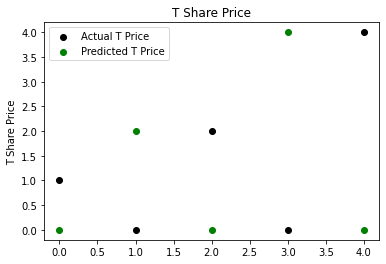

In [30]:
real = [1,0,2,0,4]
predict = [0,2,0,4,0]
another = [0,2.4, 0, 3, 0]
plt.scatter(range(len(real)), real,  color="black", label=f"Actual {company} Price")
plt.scatter(range(len(real)), predict, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [31]:
print(f"last price: {X_graph.iloc[26,0]}")
print(f"real next price: {X_graph.iloc[27,0]}")
print(f"back next price: {y_test_back[1]}")
print(f"predicted: {prediction_back[1]}")

last price: 29.0276908874512
real next price: 28.6445465087891
back next price: [28.76948547]
predicted: [27.836052]


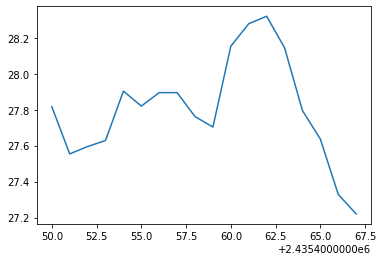

In [32]:
plt.plot(X_graph.iloc[:18,0])
#plt.scatter(range(len(y_test_back)), y_test_back,  color="black", label=f"Actual {company} Price")
#plt.scatter(range(len(y_test_back)),prediction_back, color="green", label=f"Predicted {company} Price")

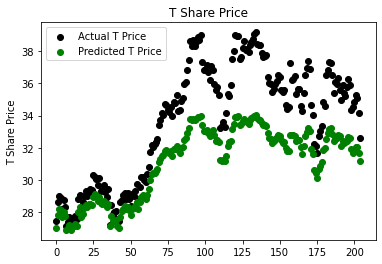

In [33]:
plt.scatter(range(len(y_test_back)), y_test_simple,  color="black", label=f"Actual {company} Price")
plt.scatter(range(len(y_test_back)),prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

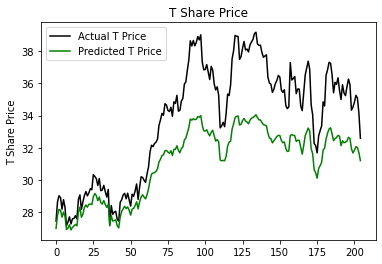

In [34]:
plt.plot(y_test_simple,  color="black", label=f"Actual {company} Price")
plt.plot(prediction_back, color="green", label=f"Predicted {company} Price")
plt.xlabel("")
plt.ylabel(f"{company} Share Price")
plt.title(f"{company} Share Price")
plt.legend()
plt.show()

In [35]:
mape = mean_absolute_percentage_error(y_test_back, prediction_back)
np.mean(mape)

7.2789693

In [36]:
mape2 = mean_absolute_percentage_error(y_test_back, y_test_simple)
np.mean(mape2)

12.462072569098806